In [ ]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [ ]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.15.0


In [ ]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.preprocessing import MinMaxScaler

# Dataset exploration

This first part is just an exploration of the dataset.

In [ ]:
categories = np.load('../data/categories.npy', allow_pickle=True)
training_data = np.load('../data/training_data.npy', allow_pickle=True)
valid_periods = np.load('../data/valid_periods.npy', allow_pickle=True)

dataset = pd.DataFrame(training_data)

In [ ]:
dataset.head()

0     1     2     3     4     5     6     7     8     9     ...      2766  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.478704   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.628000   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.959741   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.411765   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.340909   

       2767      2768      2769      2770      2771      2772      2773  \
0  0.412963  0.501852  0.756481  0.744444  0.640741  0.516667  0.602778   
1  0.624000  0.644000  0.688000  0.740000  0.640000  0.536000  0.600000   
2  0.949098  0.919297  0.916705  0.901249  0.932531  0.955206  0.960481   
3  0.307030  0.325681  0.361549  0.430416  0.486370  0.450502  0.470588   
4  0.522727  0.568182  0.772727  0.681818  0.704545  0.863636  0.727273   

       2774      2775  
0  0.367593  0.331481  
1  0.460000  0.396000  
2  0.946506  0.977140  
3  0.569584  0.571019  
4  0.818182  0.840909  

[5 rows x 2776 columns]

In [ ]:
np.unique(categories), categories.shape

(array(['A', 'B', 'C', 'D', 'E', 'F'], dtype='<U1'), (48000,))

In [ ]:
categories_unique = np.unique(categories)

In [ ]:
valid_periods, valid_periods.shape

(array([[2325, 2776],
        [2325, 2776],
        [2325, 2776],
        ...,
        [2676, 2776],
        [2676, 2776],
        [2676, 2776]]),
 (48000, 2))

In [ ]:
dataset['category'] = categories

dataset['valid_period_start'] = valid_periods[:,0]

dataset['valid_period_end'] = valid_periods[:,1]

In [ ]:
dataset.head()

0    1    2    3    4    5    6    7    8    9  ...      2769      2770  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.756481  0.744444   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.688000  0.740000   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.916705  0.901249   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.361549  0.430416   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.772727  0.681818   

       2771      2772      2773      2774      2775  category  \
0  0.640741  0.516667  0.602778  0.367593  0.331481         D   
1  0.640000  0.536000  0.600000  0.460000  0.396000         D   
2  0.932531  0.955206  0.960481  0.946506  0.977140         D   
3  0.486370  0.450502  0.470588  0.569584  0.571019         D   
4  0.704545  0.863636  0.727273  0.818182  0.840909         D   

   valid_period_start  valid_period_end  
0                2325              2776  
1                2325              2776  
2                2325              2776  
3                2712              2776  
4                2682              2776  

[5 rows x 2779 columns]

In [ ]:
dataset.describe()

0             1             2             3             4  \
count  48000.000000  48000.000000  48000.000000  48000.000000  48000.000000   
mean       0.000004      0.000004      0.000004      0.000003      0.000003   
std        0.000837      0.000813      0.000781      0.000760      0.000757   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        0.183319      0.178061      0.171051      0.166542      0.165793   

                  5             6             7             8             9  \
count  48000.000000  48000.000000  48000.000000  48000.000000  48000.000000   
mean       0.000003      0.000003      0.000003      0.000003      0.000003   
std        0.000749      0.000745      0.000741      0.000741      0.000733   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        0.164041      0.163324      0.162288      0.162288      0.160536   

       ...          2768          2769          2770          2771  \
count  ...  48000.000000  48000.000000  48000.000000  48000.000000   
mean   ...      0.528503      0.533299      0.530825      0.525855   
std    ...      0.287716      0.288655      0.289785      0.291925   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.275296      0.276525      0.269440      0.259259   
50%    ...      0.546886      0.556100      0.552312      0.544393   
75%    ...      0.788449      0.795617      0.794872      0.793385   
max    ...      1.000000      1.000000      1.000000      1.000000   

               2772          2773          2774          2775  \
count  48000.000000  48000.000000  48000.000000  48000.000000   
mean       0.522132      0.523433      0.530226      0.531927   
std        0.296271      0.302170      0.303567      0.304784   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.246887      0.242881      0.246772      0.244700   
50%        0.542242      0.550017      0.561833      0.564695   
75%        0.794734      0.802337      0.809368      0.815334   
max        1.000000      1.000000      1.000000      1.000000   

       valid_period_start  valid_period_end  
count        48000.000000           48000.0  
mean          2577.699771            2776.0  
std            137.406295               0.0  
min              0.000000            2776.0  
25%           2488.000000            2776.0  
50%           2592.000000            2776.0  
75%           2712.000000            2776.0  
max           2752.000000            2776.0  

[8 rows x 2778 columns]

In [ ]:
dataset.groupby('category').mean()

0         1         2         3         4         5  \
category                                                               
A         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
B         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
C         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
D         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
E         0.000017  0.000016  0.000016  0.000015  0.000015  0.000015   
F         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                 6         7         8         9  ...      2768      2769  \
category                                          ...                       
A         0.000000  0.000000  0.000000  0.000000  ...  0.620885  0.626487   
B         0.000000  0.000000  0.000000  0.000000  ...  0.528966  0.533102   
C         0.000000  0.000000  0.000000  0.000000  ...  0.569251  0.583194   
D         0.000000  0.000000  0.000000  0.000000  ...  0.527163  0.515642   
E         0.000015  0.000015  0.000015  0.000015  ...  0.442009  0.453948   
F         0.000000  0.000000  0.000000  0.000000  ...  0.601730  0.592200   

              2770      2771      2772      2773      2774      2775  \
category                                                               
A         0.618883  0.617952  0.605471  0.600983  0.604876  0.594848   
B         0.532623  0.529421  0.529788  0.535871  0.540306  0.541019   
C         0.583013  0.572353  0.567558  0.576767  0.581932  0.583314   
D         0.512058  0.513137  0.511772  0.512535  0.517399  0.513791   
E         0.450763  0.441319  0.436796  0.429806  0.443846  0.457754   
F         0.602121  0.607687  0.608167  0.601470  0.603126  0.606502   

          valid_period_start  valid_period_end  
category                                        
A                2497.819658            2776.0  
B                2610.057158            2776.0  
C                2567.853749            2776.0  
D                2559.009085            2776.0  
E                2612.953986            2776.0  
F                2581.169675            2776.0  

[6 rows x 2778 columns]

In [ ]:
# Get entry where the valid period start is minimum
dataset[dataset['valid_period_start'] == dataset['valid_period_start'].min()]

0         1         2         3         4         5         6  \
17143  0.183319  0.178061  0.171051  0.166542  0.165793  0.164041  0.163324   

              7         8         9  ...      2769      2770     2771  \
17143  0.162288  0.162288  0.160536  ...  0.248855  0.252103  0.26092   

           2772      2773      2774      2775  category  valid_period_start  \
17143  0.267974  0.272139  0.269904  0.262239         E                   0   

       valid_period_end  
17143              2776  

[1 rows x 2779 columns]

In [ ]:
# Get entry where the valid period start is maximum
dataset[dataset['valid_period_start'] == dataset['valid_period_start'].max()]

0    1    2    3    4    5    6    7    8    9  ...     2769  \
47852  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.47132   
47860  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.00000   

           2770      2771      2772      2773      2774      2775  category  \
47852  0.367483  0.658391  0.319624  0.544855  0.534977  0.455415         F   
47860  0.832799  0.662123  0.426647  0.250683  0.066917  0.000000         F   

       valid_period_start  valid_period_end  
47852                2752              2776  
47860                2752              2776  

[2 rows x 2779 columns]

Here, we tried to see whether there were significant deviations in the mean between the classes.

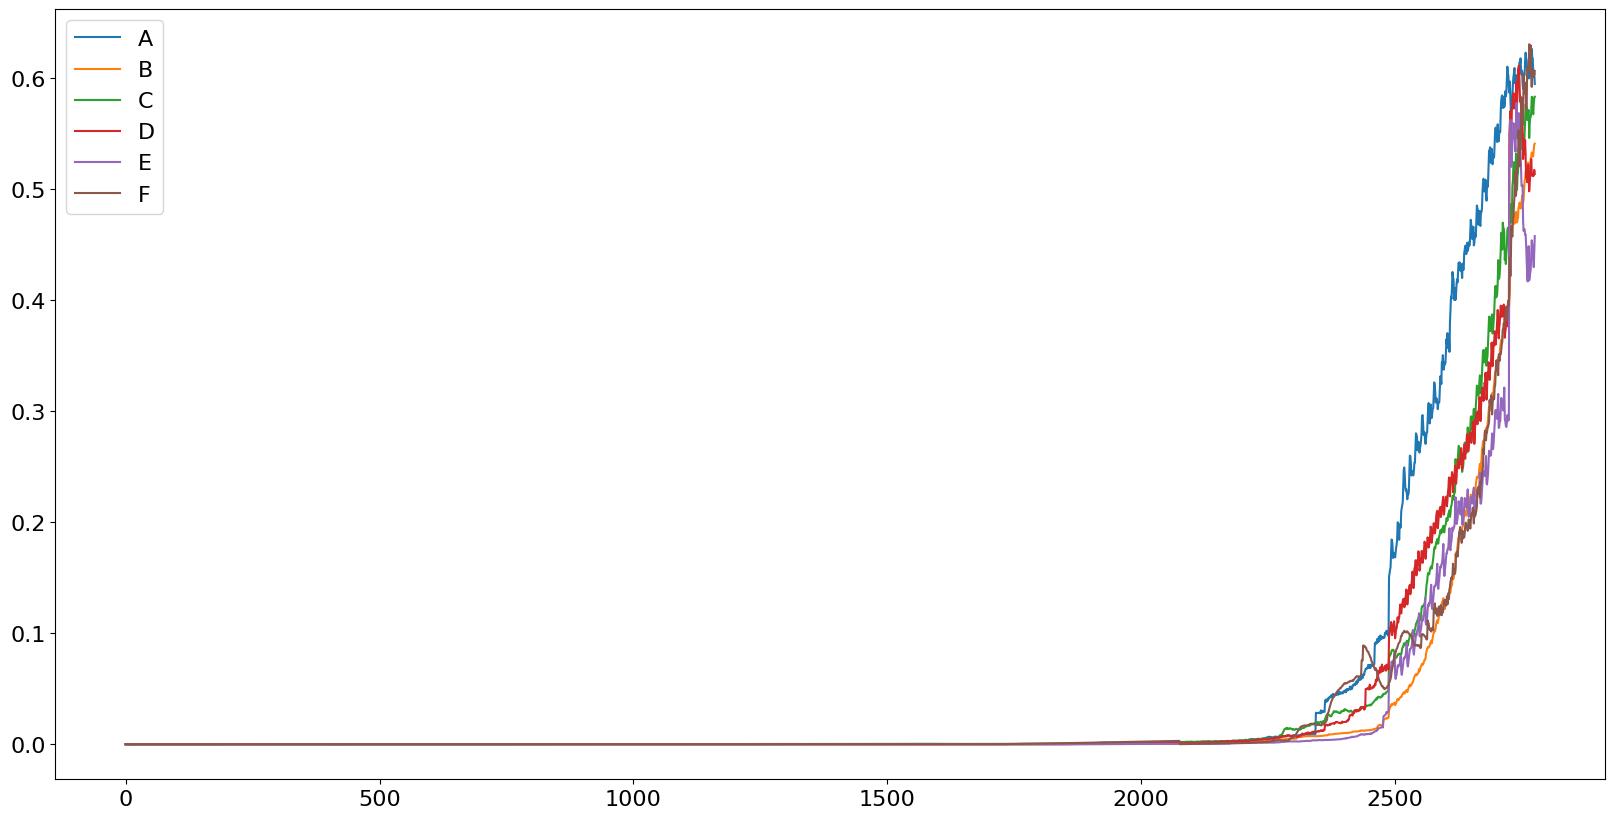

In [ ]:
# Plot mean for each category as a separate line
plt.figure(figsize=(20,10))
for category in categories_unique:
    plt.plot(dataset.loc[dataset['category'] == category,0:2775].mean(), label=category)
plt.legend()

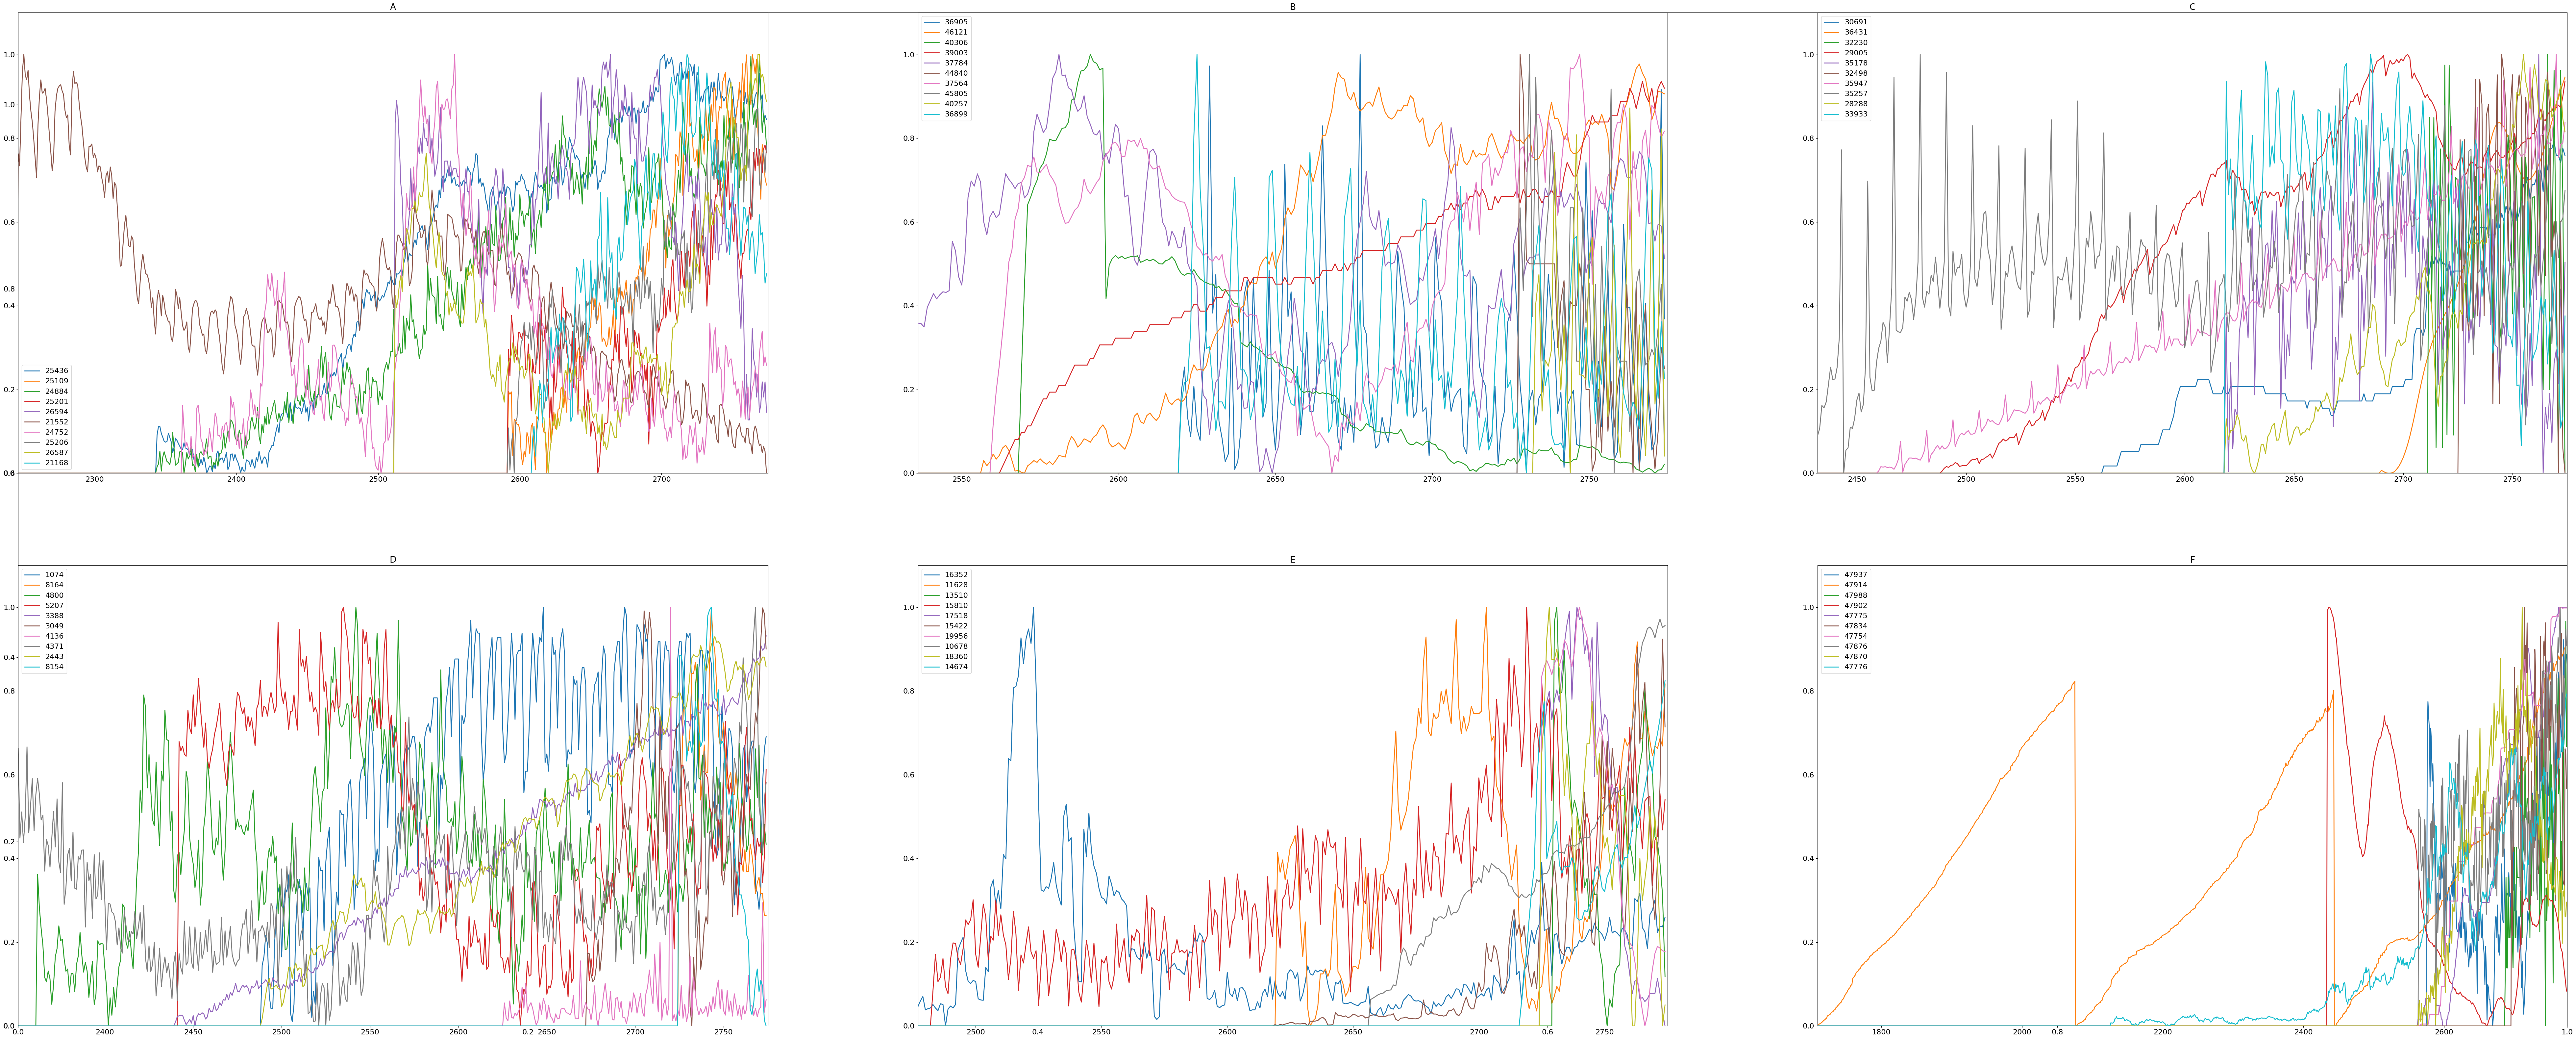

In [ ]:
# Subplot for each category
plt.figure(figsize=(100,40))
plt.ylim(0,1.1)

line_amt_per_category = 10

# Make a subplot for each category
for category in categories_unique:
    plt.subplot(2,3,ord(category)-ord('A')+1)
    plt.title(category)
    plt.ylim(0,1.1)

    max = 2775
    min = 2775

    sampled = dataset.loc[dataset['category'] == category].sample(line_amt_per_category).index

    for i in range(line_amt_per_category):
        values = dataset.iloc[sampled[i],0:2775]
        xstart = (values!=0).argmax(axis=0)
        if xstart < min:
            min = xstart
        plt.plot(values,label=sampled[i], linewidth=2)
    # Set limits to see the signals better
    plt.xlim(min,max)
    plt.legend()

# Outlier analysis

In [ ]:
colors = {'A':'red', 'B':'green', 'C':'blue', 'D':'purple','E':'black','F':'orange'}

We noticed that some signals either had big spikes or long plateaus. We tried to find the former using the gradient, and then we found out that simply checking the delta between points was better; for the latter, we defined a function that would find signals whose gradient was "mostly flat" (where how much is a parameter) for "a lot of time" (again, a parameter).

## Detect signals with big plateaus and spikes

We will try to find outliers and save their indices.

The following functions are boolean because we need to use them in batches with multithreading; this saves us a great deal of time (finding plateaus alone took 45 sec. and now it takes 2 to 3 sec.).

In [ ]:
def hasPlateaus(signalID, data_array, valid_period_start, threshold=0.00001, plateau_length=100):
    # For each signal, check whether there are at least outlier_detection_length consecutive values within the delta
    grad_less_delta = np.abs(np.gradient(data_array[signalID][valid_period_start:2776])) < threshold
    # Now we have an array of 0s and 1s
    temp = np.diff(
        np.where(
            np.concatenate(
                ([grad_less_delta[0]],
                                     grad_less_delta[:-1] != grad_less_delta[1:],
                                     [True]
                            )
                        )
                )[0])[::2]
    if np.any(temp > plateau_length):
        return True

    return False

def hasSpikes(signalID, data_array, valid_period_start, threshold=0.4):
    if np.any(np.diff(data_array[signalID][valid_period_start:2776]) > threshold):
        return True

    return False

Here we create an argument vector which is then mapped to the functions.

In [ ]:
# Find outliers with plateaus
import multiprocessing as mp
args = [(i, training_data, valid_periods[i][0], 0.01, 50) for i in range(len(training_data))]

with mp.pool.ThreadPool() as pool:
    outliersPlateausLocs = [pool.starmap(hasPlateaus, args)]

outliersPlateaus = [x for x, y in zip(range(len(dataset)), np.concatenate(outliersPlateausLocs)) if y == True]

# Find outliers with spikes
args = [(i, training_data, valid_periods[i][0], 0.4) for i in range(len(training_data))]

with mp.pool.ThreadPool() as pool:
    outliersSpikesLocs = [pool.starmap(hasSpikes, args)]

outliersSpikes = [x for x, y in zip(range(len(dataset)), np.concatenate(outliersSpikesLocs)) if y == True]

In [ ]:
outliersPlateaus = np.array(outliersPlateaus)
outliersSpikes = np.array(outliersSpikes)

# Intersect the two outlier sets
outliers = np.intersect1d(outliersPlateaus, outliersSpikes)

print("Signals with plateaus: " + str(outliersPlateaus.shape[0]))
print("Signals with spikes: " + str(outliersSpikes.shape[0]))
#print("Total outliers: " + str(outliers.shape[0]))
print("Total outliers (intersection): " + str(outliers.shape[0]))
#print("There were " + str(outliersPlateaus.shape[0] + outliersSpikes.shape[0] - outliers.shape[0]) + " signals with both plateaus and spikes")

Signals with plateaus: 3022
Signals with spikes: 10696
Total outliers (intersection): 244


In [ ]:
# Divide input data (indices referring to training_data) into categories
def divideIntoCategories(indices, categories):
    categories_unique = np.unique(categories)
    data_by_category = [[] for i in range(len(categories_unique))]
    for i in range(len(indices)):
        data_by_category[ord(categories[indices[i]])-ord('A')].append(indices[i])

    # print shape of each sublist
    for i in range(len(data_by_category)):
        print(categories_unique[i] + ": " + str(len(data_by_category[i])))

    return data_by_category

In [ ]:
outliers_by_category = divideIntoCategories(outliers, categories)

A: 5
B: 90
C: 39
D: 37
E: 66
F: 7


In [ ]:
def plotByCategory(data_by_category, dataset, categories_unique, max_amt_per_category=10):
    # subplot for each category
    plt.figure(figsize=(100,40))
    plt.ylim(0,1.1)

    amt_plotted_per_category = [0 for i in range(len(categories_unique))]

    # shuffle data in each sublist
    sample_set = data_by_category

    for i in range(len(sample_set)):
        random.shuffle(sample_set[i])

    #make a subplot for each category
    for category in categories_unique:
        plt.subplot(2,3,ord(category)-ord('A')+1)
        plt.title(category)
        plt.ylim(0,1.1)

        max = 2775
        min = 2775

        category_idx = ord(category)-ord('A')

        #sampled = dataset.loc[dataset['category'] == category].sample(max_amt_per_category).index
        for i in range(len(sample_set[category_idx])): #dataset.size
            if amt_plotted_per_category[category_idx] >= max_amt_per_category:
                break
            idx = sample_set[category_idx][i]
            values = dataset.iloc[idx,0:2775]
            xstart = (values!=0).argmax(axis=0)
            if xstart < min:
                min = xstart
            plt.plot(values,label=idx, linewidth=2)
            amt_plotted_per_category[category_idx] += 1
        # set limits to see the signals better
        plt.xlim(min,max)
        plt.legend()

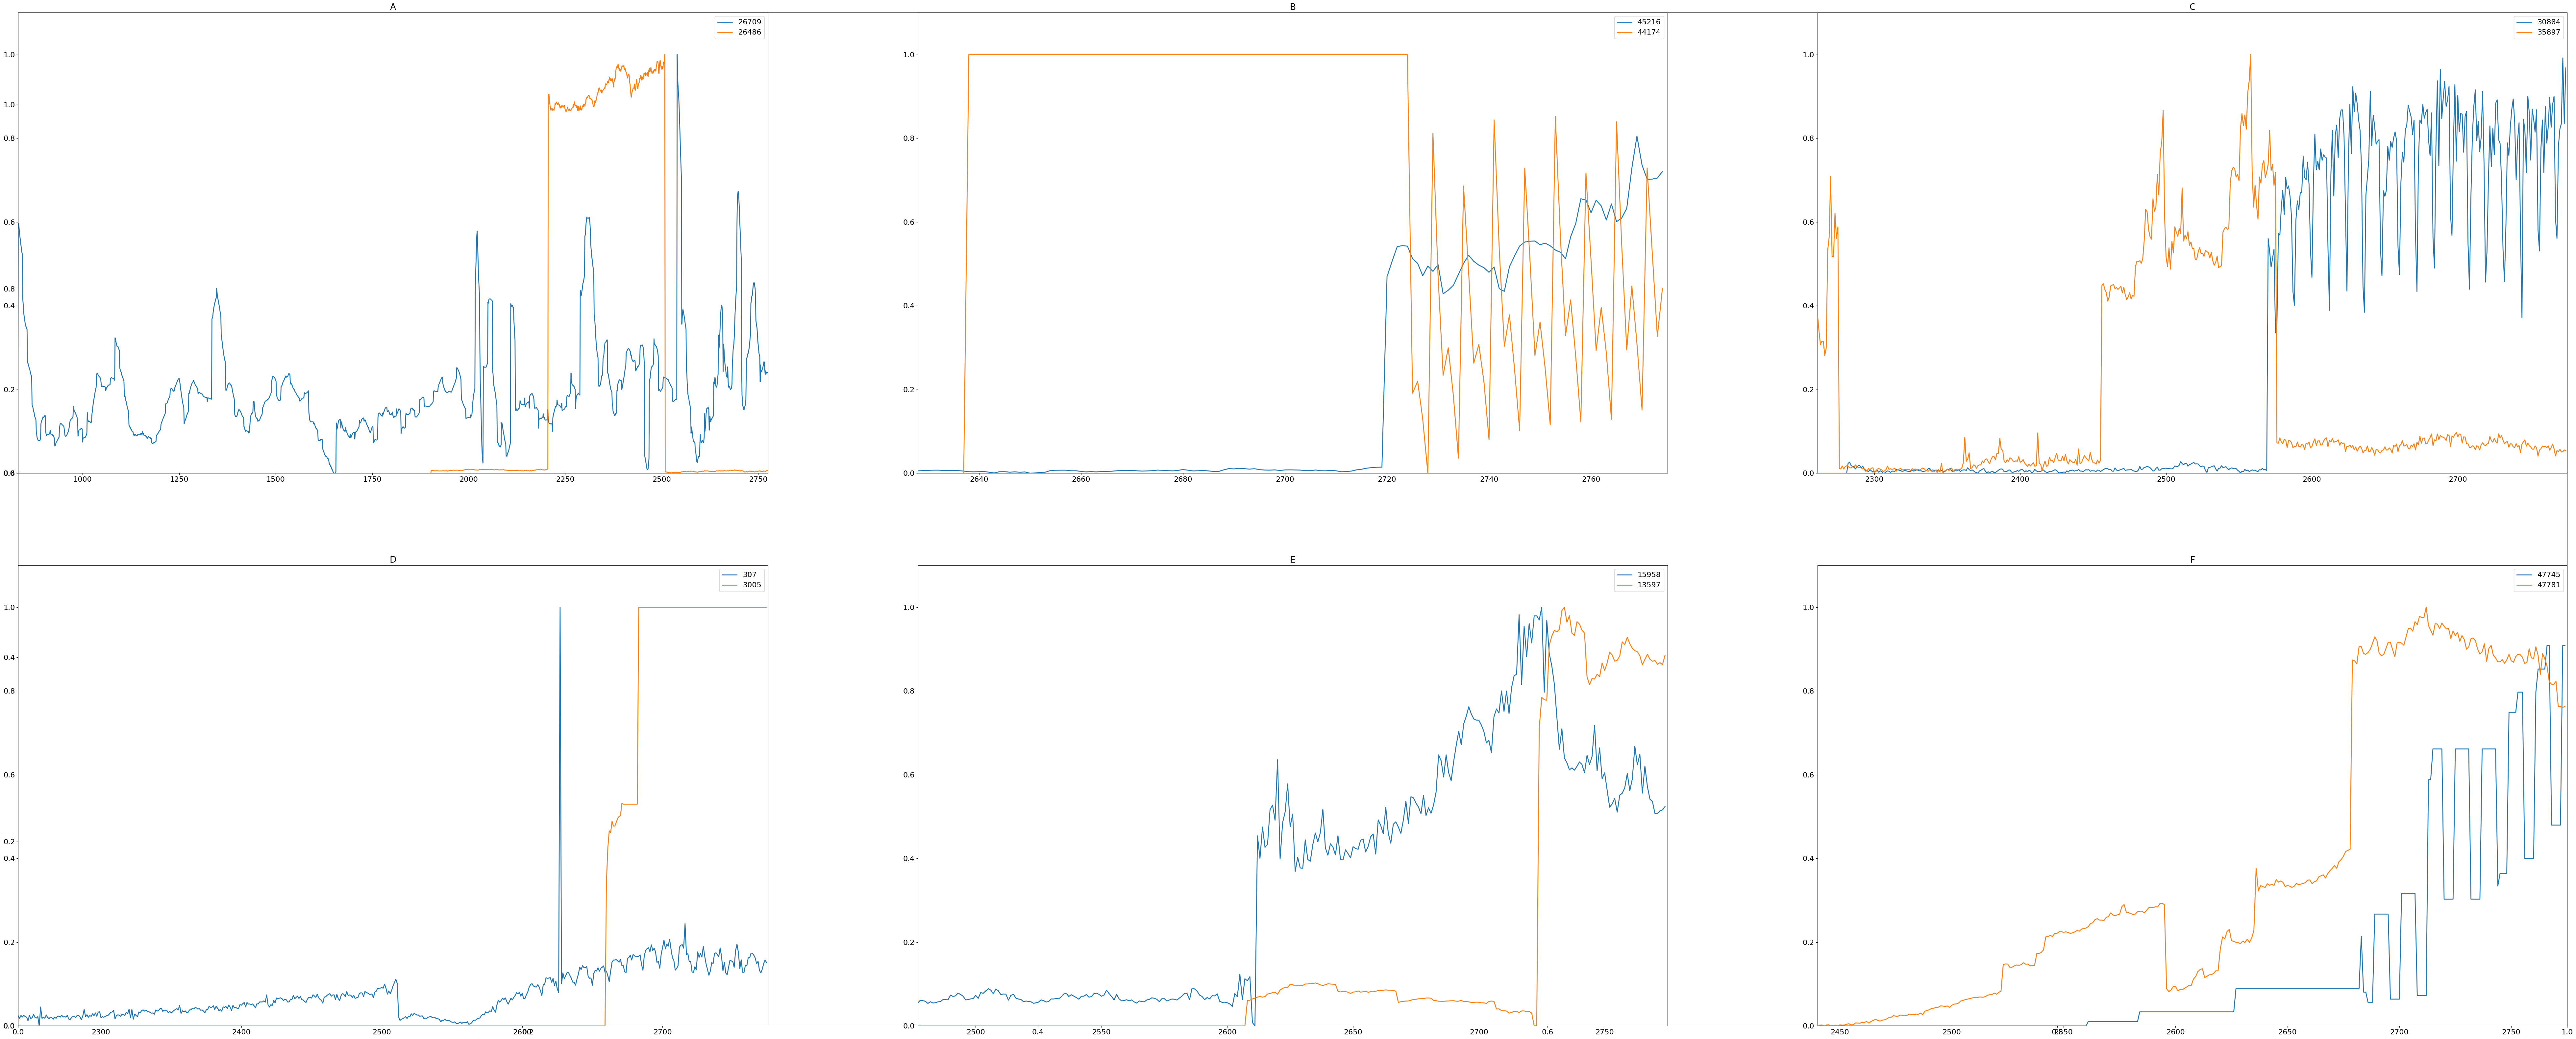

In [ ]:
plotByCategory(outliers_by_category, dataset, categories_unique, 2)

## Plot autocorrelations

Here we compute the autocorrelations for each signal; this is obviously an array, so we have to assign each signal to its category by matching its index with the category vector's.

This did not prove to be too helpful.

In [ ]:
# Divide input data into categories, assuming the two arrays are of the same length and there is an index correspondence
def divideIntoCategoriesFromData(data, categories):
    categories_unique = np.unique(categories)
    data_by_category = [[] for i in range(len(categories_unique))]
    for i in range(len(data)):
        data_by_category[ord(categories[i])-ord('A')].append(i)

    # print shape of each sublist
    for i in range(len(data_by_category)):
        print(categories_unique[i] + ": " + str(len(data_by_category[i])))

    return data_by_category

Again, we had to make this multithreaded to save time.

In [ ]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size//2:]

In [ ]:
with mp.pool.ThreadPool(12) as pool:
    autocorrelations = pool.map(autocorr, [training_data[outliers[i]][valid_periods[outliers[i]][0]:valid_periods[outliers[i]][1]] for i in range(len(outliers))])

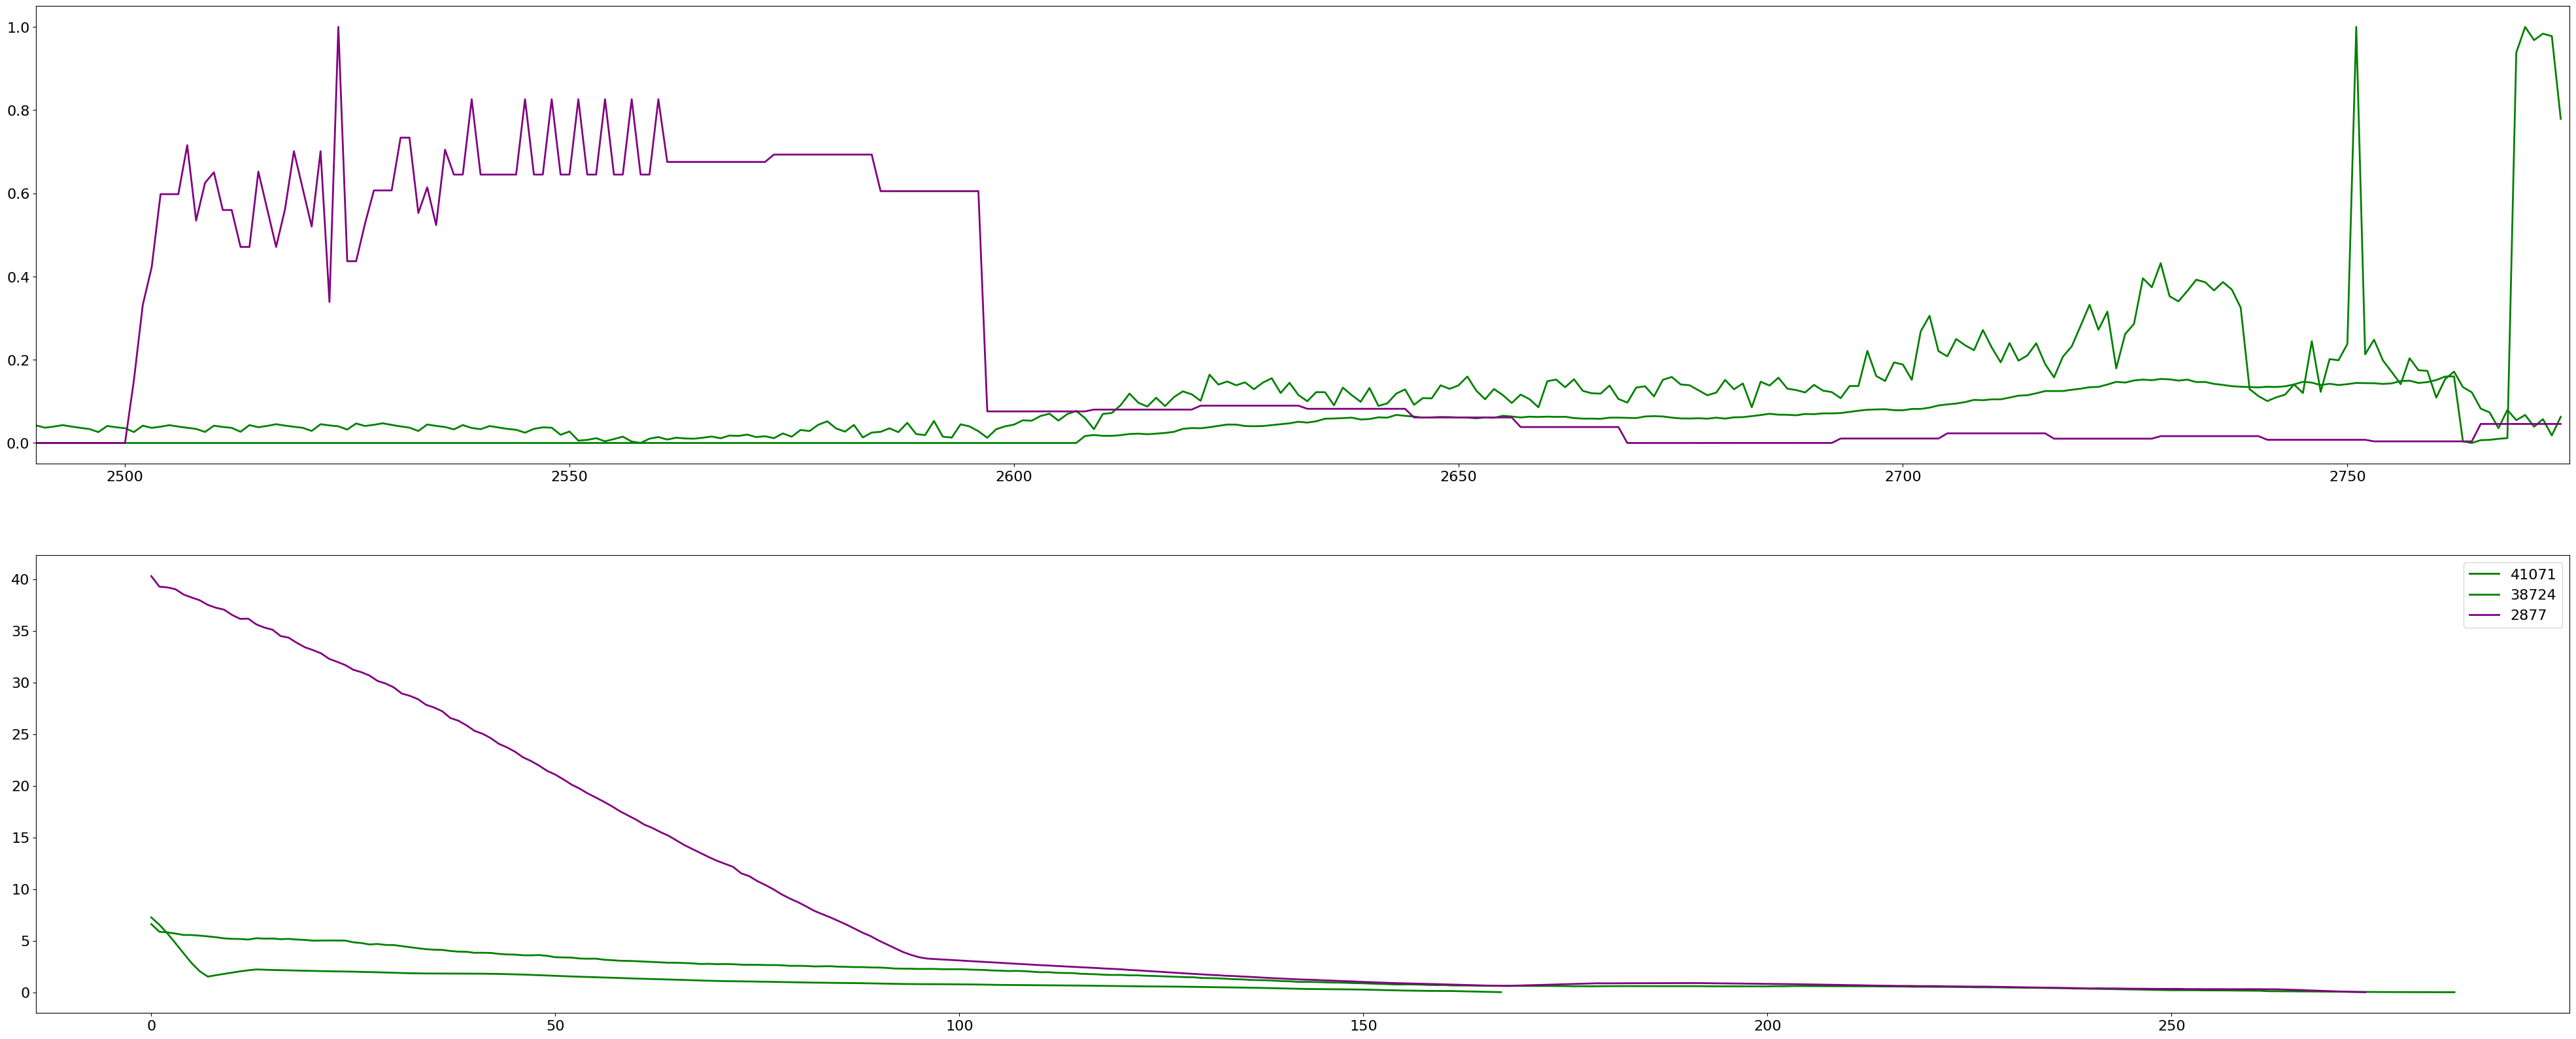

In [ ]:
# Plot a random signal and its autocorrelation in a subplot
plt.figure(figsize=(50,20))
#plt.ylim(0,1.1)

max = 2775
min = 2775

for i in range(3):
    randomidx = np.random.randint(0,len(autocorrelations))
    idx = outliers[randomidx]

    values = dataset.iloc[idx,0:2775]
    xstart = (values!=0).argmax(axis=0)
    if xstart < min:
        min = xstart

    plt.subplot(2,1,1)
    plt.plot(values, c=colors[categories[idx]],label=idx, linewidth=2)
    plt.xlim(min,max)

    plt.subplot(2,1,2)
    plt.plot(autocorrelations[randomidx], c=colors[categories[idx]],label=idx, linewidth=2)

plt.legend()

## Bonus: difference between signal gradients and deltas between points

Grad: 0.3574346405228758 Diff: 0.6699346405228758


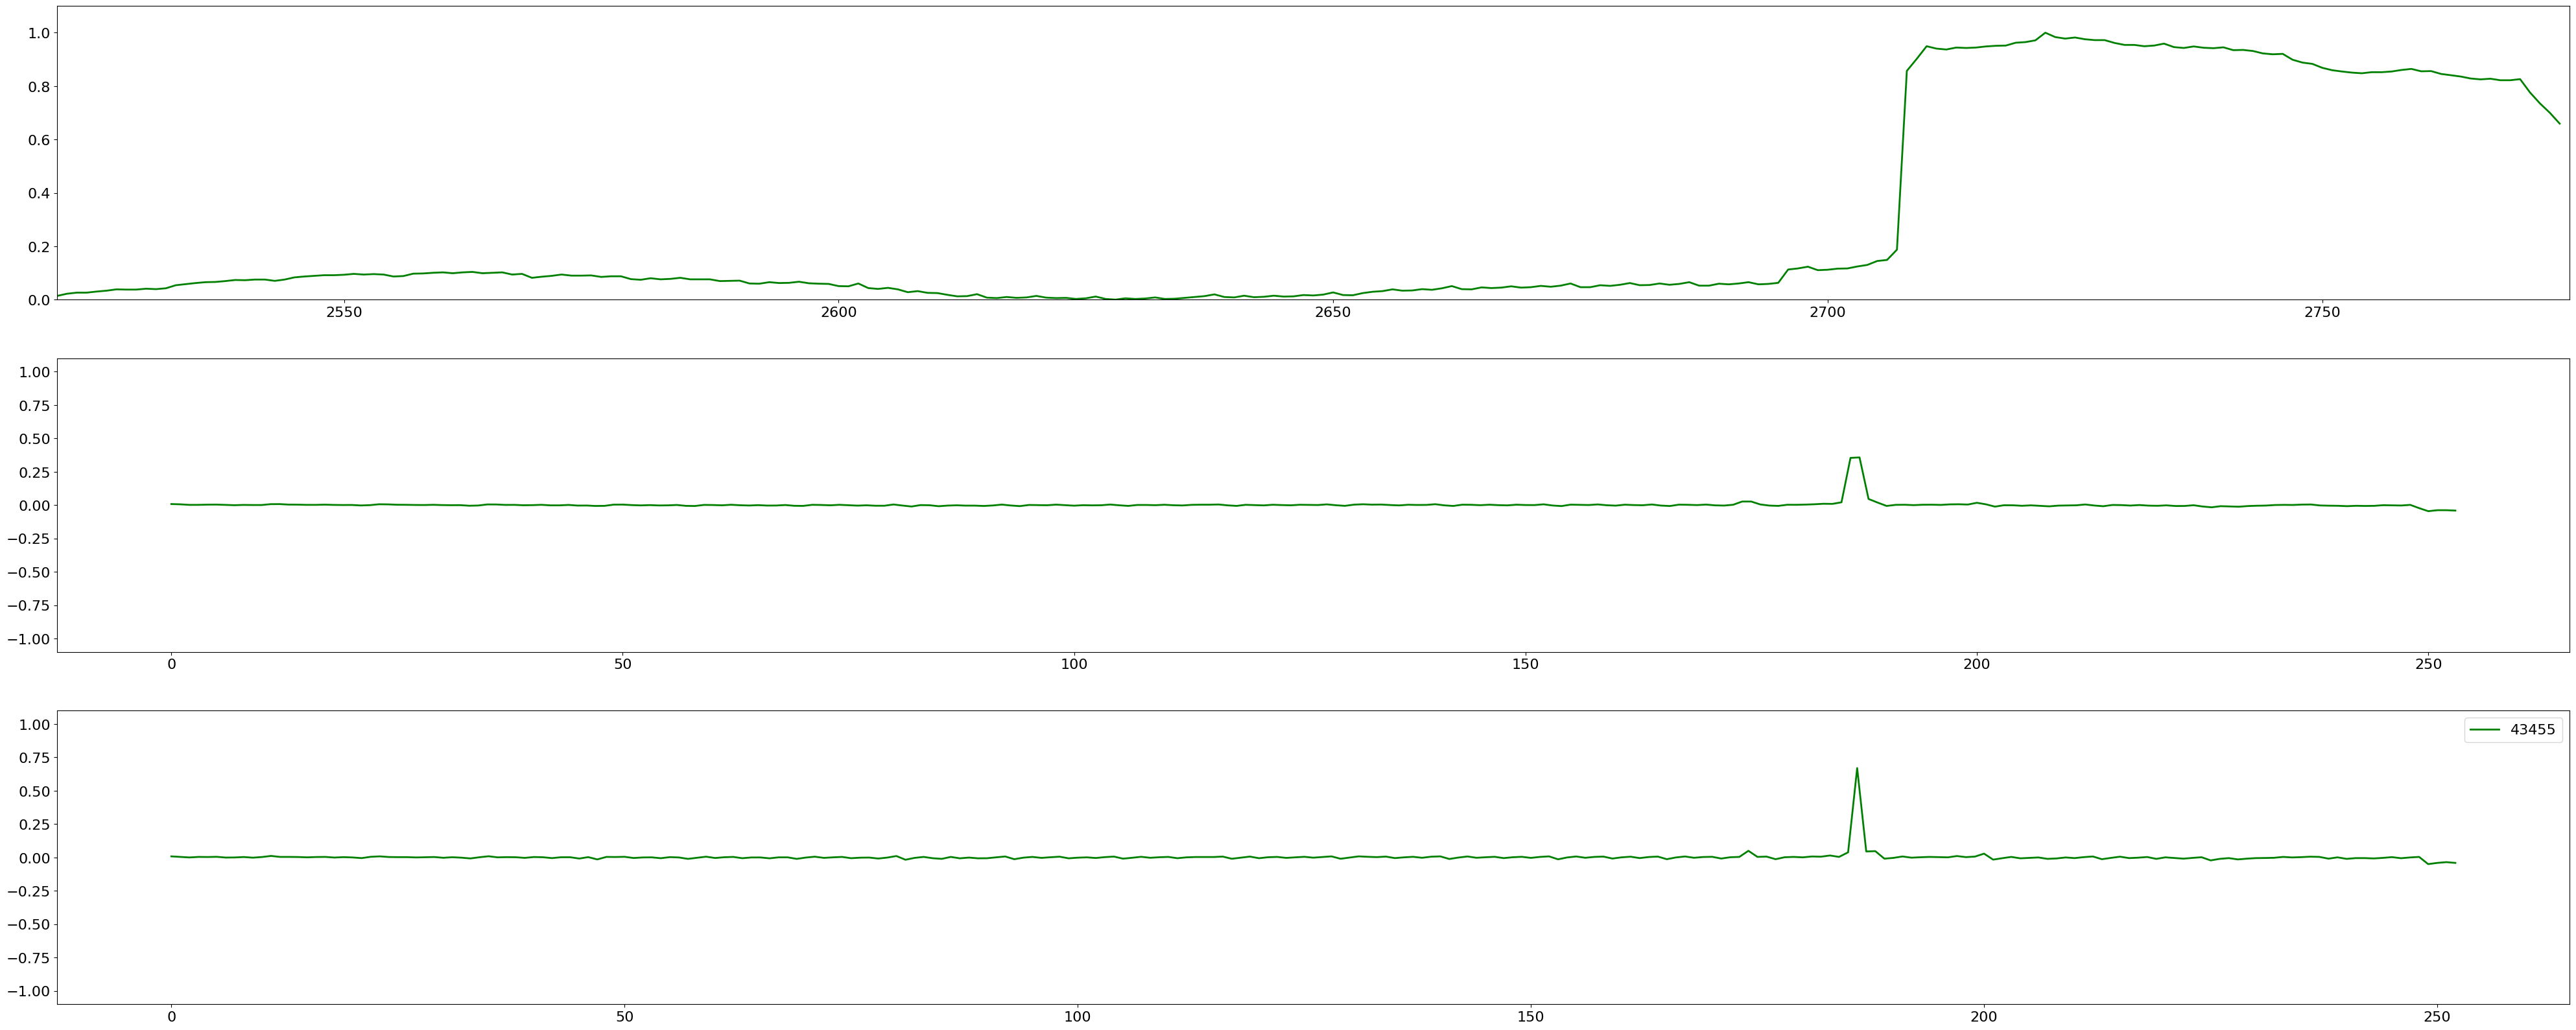

In [ ]:
# plot a random signal and its autocorrelation in a subplot
plt.figure(figsize=(50,20))

max = 2775
min = 2775

for i in range(1): #dataset.size
    # get random idx
    randomidx = np.random.randint(0,len(autocorrelations))
    idx = outliers[randomidx]

    values = dataset.iloc[idx,0:2775]
    xstart = (values!=0).argmax(axis=0)
    if xstart < min:
        min = xstart

    plt.subplot(3,1,1)
    plt.plot(values, c=colors[categories[idx]],label=idx, linewidth=2)
    plt.xlim(min,max)
    plt.ylim(0,1.1)

    grad = np.gradient(values[xstart:])
    diffs = np.diff(values[xstart:])

    plt.subplot(3,1,2)
    plt.plot(grad, c=colors[categories[idx]],label=idx, linewidth=2)
    plt.ylim(-1.1,1.1)

    plt.subplot(3,1,3)
    plt.plot(diffs, c=colors[categories[idx]],label=idx, linewidth=2)
    plt.ylim(-1.1,1.1)

    # print max abs. value of gradient
    print("Grad: " + str(np.max(np.abs(grad))) + " Diff: " + str(np.max(np.abs(diffs))))

# set limits to see the signals better
plt.legend()